# IMDB Movies Reviews 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/imdb.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [2]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
#Summary of the dataset
df.describe()


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [4]:
#sentiment count
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

## Descriptive figures

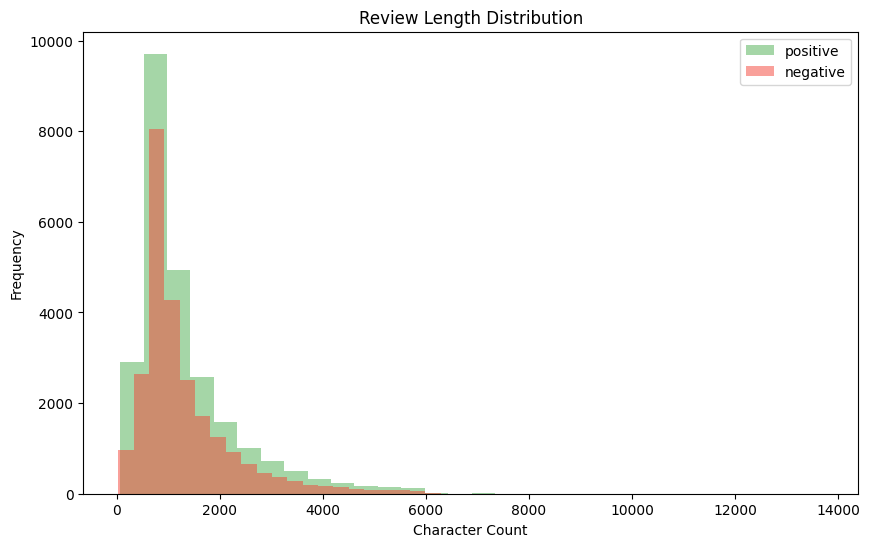

In [5]:
df['review_length'] = df['review'].apply(len)

plt.figure(figsize=(10,6))
for sentiment, color in [('positive','#4CAF50'), ('negative','#F44336')]:
    subset = df[df['sentiment']==sentiment]
    plt.hist(subset['review_length'], bins=30, alpha=0.5, 
             label=sentiment, color=color)
plt.title('Review Length Distribution')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.legend()

# Save to figures folder
plt.savefig('../figures/length_distribution.png', bbox_inches='tight', dpi=300)
plt.show()



In [6]:
# Word cloud for positive reviews
from wordcloud import WordCloud

positive_text = ' '.join(df[df['sentiment']=='positive']['review'])
WordCloud().generate(positive_text).to_image()

# Save to figures folder
plt.savefig('../figures/positive_wordcloud.png', bbox_inches='tight', dpi=300)  #
plt.show()



<Figure size 640x480 with 0 Axes>

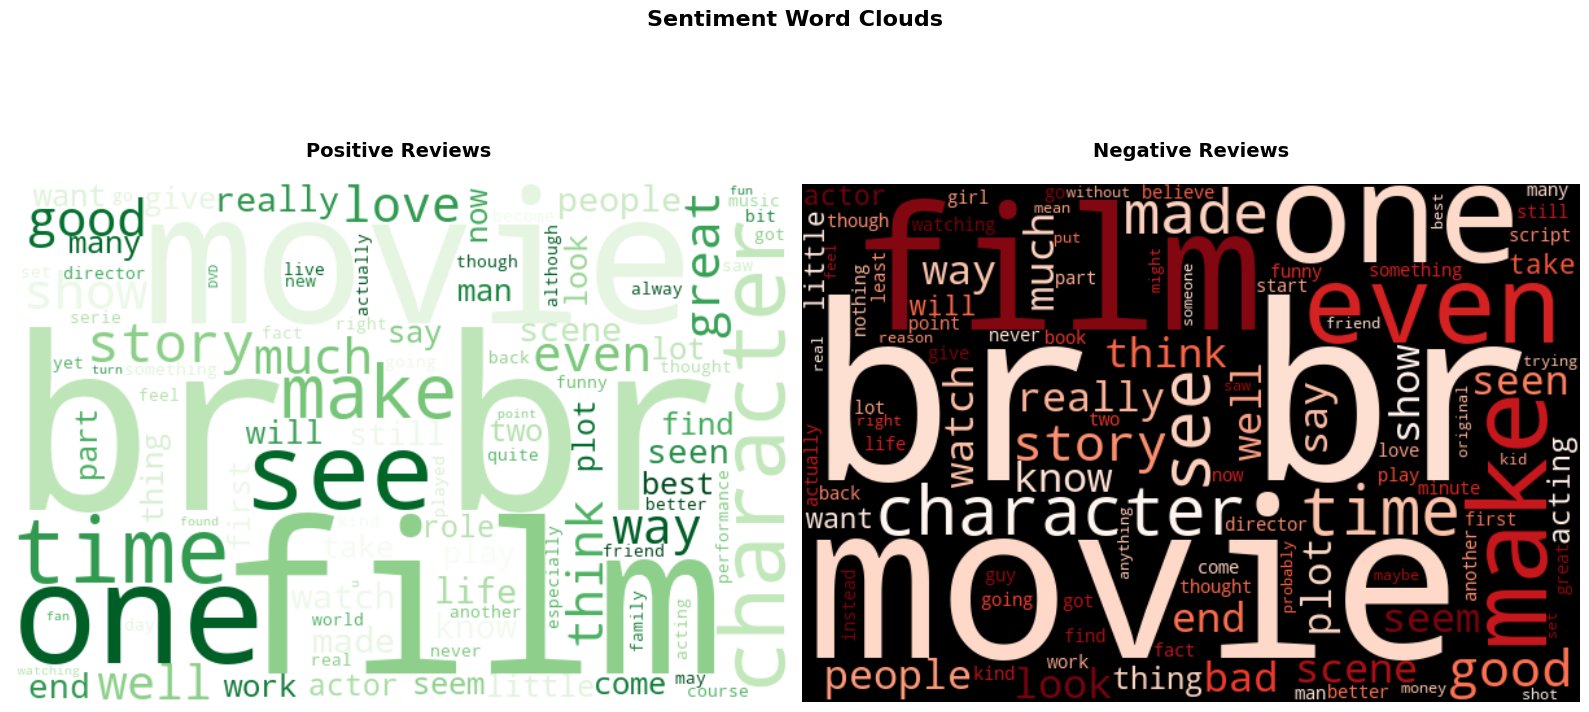

In [7]:
# Prepare text data
positive_text = ' '.join(df[df['sentiment']=='positive']['review'])
negative_text = ' '.join(df[df['sentiment']=='negative']['review'])

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Positive word cloud
pos_wc = WordCloud(width=600, height=400, 
                   background_color='white',
                   colormap='Greens',  # Green theme
                   max_words=100).generate(positive_text)
ax1.imshow(pos_wc, interpolation='bilinear')
ax1.set_title('Positive Reviews', pad=20, size=14, weight='bold')
ax1.axis('off')

# Negative word cloud
neg_wc = WordCloud(width=600, height=400, 
                   background_color='black',
                   colormap='Reds',  # Red theme
                   max_words=100).generate(negative_text)
ax2.imshow(neg_wc, interpolation='bilinear')
ax2.set_title('Negative Reviews', pad=20, size=14, weight='bold')
ax2.axis('off')

# Add main title
plt.suptitle('Sentiment Word Clouds', y=1.02, size=16, weight='bold')
plt.tight_layout()
# Save to figures folder
plt.savefig('../figures/sentiment_wordcloud.png', bbox_inches='tight', dpi=300)  #
plt.show()



In [8]:
print(df.iloc[0]['review'])  # Actual content example


One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac